# 120.LeNet-5 (1998, Yan LeCunn)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7)
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Activation

from tensorflow.keras.datasets import mnist
np.random.seed(101)

### train, test split

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### scaling 
- 0 `~` 1 사이로 pixel 값을 scale

In [3]:
X_train_scaled = X_train / 255.
X_test_scaled = X_test / 255.

### Conv2D layer 의  입력 사양에 맞추어 3 dimension 으로 차원 증가

In [4]:
X_train_scaled = np.expand_dims(X_train_scaled, axis=3)
X_test_scaled = np.expand_dims(X_test_scaled, axis=3)

In [5]:
X_train_scaled.shape
X_test_scaled.shape

(10000, 28, 28, 1)

### label 을 one-hot-encoding

In [8]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

## tf.data 를 이용한 shuffling and batch 구성

In [9]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot)).shuffle(10000).batch(128)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_onehot)).batch(128)

## LeNet 구성

<img src="https://d2l.ai/_images/lenet.svg" width="800" />

In [11]:
# LeNet
model = tf.keras.Sequential()

model.add(Conv2D(6, kernel_size=5, padding="same", input_shape=(28, 28, 1)))
model.add(Activation("relu"))

model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

model.add(Conv2D(16, kernel_size=5, padding="valid"))
model.add(Activation('relu'))

model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

model.add(Flatten())

model.add(Dense(120))
model.add(Activation("relu"))

model.add(Dense(84))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_6 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)              

In [13]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3995 - accuracy: 0.8824 - val_loss: 0.1310 - val_accuracy: 0.9631
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1115 - accuracy: 0.9663 - val_loss: 0.0734 - val_accuracy: 0.9777
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0772 - accuracy: 0.9761 - val_loss: 0.0532 - val_accuracy: 0.9820
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0607 - accuracy: 0.9814 - val_loss: 0.0464 - val_accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0507 - accuracy: 0.9842 - val_loss: 0.0451 - val_accuracy: 0.9843


In [15]:
score = model.evaluate(test_ds, verbose=0)

In [16]:
print("Test Score ", score[0])
print("Test Accuracy ", score[1])

Test Score  0.0450664721429348
Test Accuracy  0.9843000173568726


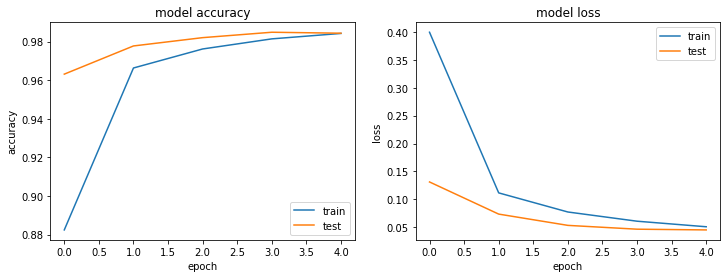

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])

In [18]:
y_pred = model.predict_classes(X_test_scaled)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [19]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))

[[ 976    0    1    0    0    0    0    1    2    0]
 [   0 1132    2    0    0    0    0    1    0    0]
 [   3    0 1018    0    1    0    0    9    0    1]
 [   0    0    4  992    0    5    0    6    1    2]
 [   0    1    0    0  966    0    4    1    0   10]
 [   2    0    0    5    0  878    2    2    2    1]
 [  12    5    1    1    1    4  933    0    1    0]
 [   1    3    3    1    0    0    0 1017    0    3]
 [   7    1    6    7    1    2    0    5  939    6]
 [   1    4    1    1    3    1    0    6    0  992]]


Test Accuracy : 0.9843


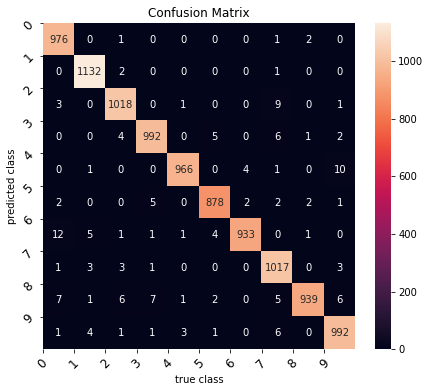

In [22]:
import seaborn as sns

plt.figure(figsize=(7,6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

plt.xticks(np.arange(10), list(range(10)), rotation=45, fontsize=12)
plt.yticks(np.arange(10), list(range(10)), rotation=45, fontsize=12)
plt.xlabel("true class")
plt.ylabel("predicted class")
plt.title('Confusion Matrix')
print('Test Accuracy :', accuracy_score(y_test, y_pred))